In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import sys,traceback
import seaborn as sns
plt.style.use("seaborn")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from sklearn import preprocessing
from scipy.stats import normaltest , skewtest ,kurtosistest
from scipy.stats import chi2_contingency

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split , KFold
from sklearn.metrics import accuracy_score
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

In [ ]:
#Import Dataset
hr_data = pd.read_csv('HR_comma_sep.csv')

# Data Cleaning

-Data preprocessing, EDA part.
- mentor available from 12 to 1
- univariate, bivariate, multivariate analysis, 
- univariate -take single columns and prepare graphs for them, get some fruitful information-- find patterns in the data
- bivariate - take 2 columns at a time - 1.target variable and 2, independent variable.
- multivariate - plot heatmaps, correlation plots figure out some patterns.
- use plotly - libs used for visualizations.
- dedicated marks for each capstone project
- 10 marks for completing data preprocessing, EDA, give a quick introduction of what is being done just like mini projects.
- discuss about data balancing once tasks are done


- Univariate Analysis - Madhav
- Bivariate analysis - Durga P
- Multivariate - Mallika
- Visualization - Abhijitram




In [ ]:
#Describe data set
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr_data.head()

In [ ]:
#Rename 'sales' column to department 
hr_data=hr_data.rename(columns = {'sales':'department'})
#Display data type for each column
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [ ]:
#To get the unique values for department
hr_data['department'].unique()

In [ ]:
#Check for missing values
hr_data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

## Bivariate Analysis


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
categorical = ['promotion_last_5years' ,'left' ,'Work_accident' ,'salary' , 'department']
for i in categorical :
    hr_data[i] = hr_data[i].astype('category')
hr_data.describe(include=['category'])

Relations between employees who Left the organisation  and satisfaction level

In [ ]:
for i in hr_data.select_dtypes(['float' , 'int']).columns:

    sns.boxplot(x='left', y=i, data=hr_data, color='#99c2a2')
    plt.show()
    model = ols( '{} ~ C(left)'.format(i), data=hr_data).fit()
    

In [ ]:
sns.heatmap(hr_data.select_dtypes(['float' , 'int']).corr() , annot = True , vmin=-1, vmax=1, center= 0, cmap= 'RdYlGn')

In [ ]:
for i in hr_data.select_dtypes(['category']).drop(columns=['left']).columns:
    p =  (chi2_contingency(pd.crosstab(hr_data[i], hr_data['left']))[1])
    if p < .001 :
        print('employee choice regarding leaving gets affected by {} (reject H0)'.format(i))
    else :
        print('employee choice regarding leaving not affected by {} (fail to reject H0)'.format(i))

    contigency_pct = pd.crosstab(hr_data[i], hr_data['left'], normalize='index')
    sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
    plt.show()

## Multivariate analysis

In [ ]:
#To get the unique values for department and salary
hr_data['department'].unique()


In [ ]:
hr_data['department_cat'] = hr_data['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'],
                        [0,1,2,3,4,5,6,7,8,9])

In [ ]:
hr_data['salary'].unique()

In [ ]:
hr_data['salary_cat'] = hr_data['salary'].replace(['low', 'medium', 'high'],[0,1,2])

In [ ]:
hr = hr_data.drop(labels = ['department','salary'],axis=1)

In [ ]:
#plot heatmap
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( hr, linewidth = 1 , annot = True)
plt.title( "HeatMap for HR data" )
plt.show()

## Conclusions from EDA
* satisfaction level, work accidents, salary, time spent in the company seem to affect whether an employee will leave the organization the most.
* Satisfaction level and left are negatively correlated so less the satisfaction_level, more likely the employee is to leave the org
* work accidents and left are negatively correlated so an employee facing a work accident is less likely to leave the org
* salary and left are negatively correlated so an employee being paid less is more likely to leave the org
* time spent in the company and left are positively correlated so an employee who has spend more time in the org is more likely to leave it.

# Data Modelling
* Decision Trees - this method takes into account observations about an item to 
predict that item’s value
* Random Forest - It can handle binary features, categorical features, and numerical features. There is very little pre-processing that needs to be done
* Logistic Regression - To understand the relationship between the dependent variable and one or more independent variables by estimating probabilities
* Support Vector Machine - a supervised machine learning algorithm used for both classification and regression


## Decision Tree


### Import required packages

In [ ]:
# Install dtreeviz library
!pip -qq install dtreeviz 

     |████████████████████████████████| 61 kB 205 kB/s 


In [ ]:
from matplotlib.colors import ListedColormap                                    # to import color map                                          
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor          # to import DT classifier and Regressor
import graphviz                                                                 # to import graphviz 
from dtreeviz.trees import dtreeviz                                             # to import dtreeviz 
%matplotlib inline

### Training the Decision Tree

In [ ]:
# Prepare the data into X (predictor) and Y (target)
X = hr.drop(labels='left',axis=1)
y = hr['left']

In [ ]:
x_train_dt , x_test_dt , y_train_dt , y_test_dt = train_test_split(X , y)

In [ ]:
# First tree without restrictions
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train_dt,y_train_dt)

# Second tree with hyperparameters
tree_clf2 = DecisionTreeClassifier(max_depth =2, min_samples_leaf =1, min_samples_split = 2, random_state=2)
tree_clf2.fit(x_train_dt,y_train_dt)

#third tree with class weights balanced and hyperparameters
tree_clf3 = DecisionTreeClassifier(max_depth =2, min_samples_leaf =1, min_samples_split = 2, random_state=2, class_weight='balanced')
tree_clf3.fit(x_train_dt,y_train_dt)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=2)

### Predictions

In [ ]:
# Predictions
y_pred_train_dt = tree_clf.predict (x_train_dt)
y_pred_train_2 = tree_clf2.predict (x_train_dt)
y_pred_train_3 = tree_clf3.predict (x_train_dt)

In [ ]:
accuracy_score(y_train_dt,y_pred_train_dt)

1.0

Decision tree classifier with no hyperparameter tuning is closely fitting itself according to the training instances and hence the accuracy is 1, i.e. there is overfitting.

In [ ]:
accuracy_score(y_train_dt,y_pred_train_2)

0.8510978753666992

To avoid overfitting the training data, the hyperparameters have been restricted and passed during the modeling.

In [ ]:
accuracy_score(y_train_dt,y_pred_train_3)

0.8439861321006311

### Testing the Model

In [ ]:
# Model 1 with no hyperparameter tuning
y_pred_test = tree_clf.predict (x_test_dt)

In [ ]:
accuracy_score(y_test_dt,y_pred_test)

0.9757333333333333

In [ ]:
# Classification Report for Model 1
print(classification_report(y_test_dt,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2826
           1       0.94      0.96      0.95       924

    accuracy                           0.98      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



In [ ]:
# Model 2 with hyperparameter tuning
y_pred_test_2 = tree_clf2.predict (x_test_dt)

In [ ]:
accuracy_score(y_test_dt,y_pred_test_2)

0.8464

In [ ]:
# Classification report for Model 2
print(classification_report(y_test_dt,y_pred_test_2))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2826
           1       0.89      0.43      0.58       924

    accuracy                           0.85      3750
   macro avg       0.87      0.71      0.74      3750
weighted avg       0.85      0.85      0.83      3750



In [ ]:
#Model 3 with balanced dataset and hyperparameter tuning
y_pred_test_3 = tree_clf3.predict (x_test_dt)

In [ ]:
accuracy_score(y_test_dt,y_pred_test_3)

0.8448

In [ ]:
# Classification report for model 3
print(classification_report(y_test_dt,y_pred_test_3))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2826
           1       0.62      0.93      0.75       924

    accuracy                           0.84      3750
   macro avg       0.80      0.87      0.82      3750
weighted avg       0.89      0.84      0.85      3750



# Logistic Regression

In [ ]:
X = pd.get_dummies(hr_data, columns=['Work_accident',  'promotion_last_5years', 'department', 'salary'] , drop_first=True).drop(columns=['left'])

In [ ]:
Y = hr_data['left']

In [ ]:
columns =X.columns 

Dividing data into train and test sets

In [ ]:
x_train_lr , x_test_lr , y_train_lr , y_test_lr = train_test_split(X , Y )

Scaling data (to get rid of skewness)

In [ ]:
scaler  = preprocessing.MinMaxScaler()

In [ ]:
x_train_lr= scaler.fit_transform(x_train_lr)

In [ ]:
x_test_lr = scaler.fit_transform(x_test_lr)

In [ ]:
# instantiate the model
logreg = LogisticRegression( random_state=0)

In [ ]:
# fit the model
logreg.fit(x_train_lr, y_train_lr)

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

In [ ]:
y_pred_train_lr = logreg.predict (x_train_lr)

In [ ]:
accuracy_score(y_train_lr,y_pred_train_lr.reshape(-1,))

0.7821139656858387

Testing the model logistic regression

In [ ]:
y_pred_test_lr = logreg.predict (x_test_lr)

In [ ]:
accuracy_score(y_test_lr,y_pred_test_lr.reshape(-1,))

0.7864

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

In [ ]:
df1 = hr_data

In [ ]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df1[var], prefix=var)
    df2=df1.join(cat_list)
    df1=df2

In [ ]:
X = df1.drop(['left', 'department', 'salary'] ,axis=1)

In [ ]:
y = hr_data['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((10499, 22), (4500, 22))

In [ ]:
# Model with hyperparameters
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifier_rf.oob_score_

0.9218973235546243

In [ ]:
y_pred = classifier_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, classifier_rf.predict(X_test))

0.9171111111111111

In [ ]:
print(classification_report(y_test, classifier_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3428
           1       0.98      0.66      0.79      1072

    accuracy                           0.92      4500
   macro avg       0.94      0.83      0.87      4500
weighted avg       0.92      0.92      0.91      4500



In [ ]:
kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.988


# Model selection


In [ ]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test_lr, logreg.predict(x_test_lr))))
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, classifier_rf.predict(X_test))))
print('Decision tree Accuracy: {:.3f}'.format(accuracy_score(y_test_dt, tree_clf3.predict(x_test_dt))))

Logistic regression accuracy: 0.786
Random Forest Accuracy: 0.917
Decision tree Accuracy: 0.845


Precision and Recall

We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

In [ ]:
#Precison Recall Scores for Random Forest
print(classification_report(y_test, classifier_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3428
           1       0.98      0.66      0.79      1072

    accuracy                           0.92      4500
   macro avg       0.94      0.83      0.87      4500
weighted avg       0.92      0.92      0.91      4500



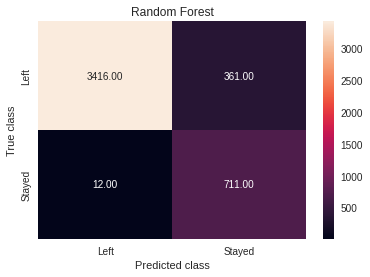

In [ ]:
#Confusion Matrix for Random Forest
y_pred = classifier_rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
#PRScores for Logistic Regression
print(classification_report(y_test_lr, logreg.predict(x_test_lr)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2861
           1       0.59      0.33      0.42       889

    accuracy                           0.79      3750
   macro avg       0.70      0.63      0.65      3750
weighted avg       0.76      0.79      0.76      3750



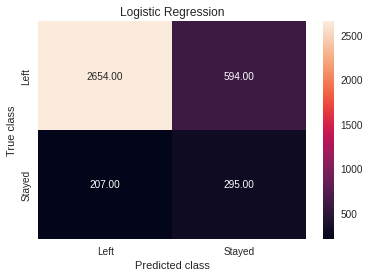

In [ ]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(x_test_lr)
logreg_cm = confusion_matrix(logreg_y_pred, y_test_lr)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [ ]:
#PRScores for Decision Tree
print(classification_report(y_test_dt, tree_clf3.predict(x_test_dt)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2826
           1       0.62      0.93      0.75       924

    accuracy                           0.84      3750
   macro avg       0.80      0.87      0.82      3750
weighted avg       0.89      0.84      0.85      3750



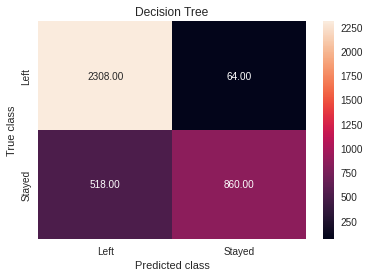

In [ ]:
#Confusion Matrix for Decision Tree
dt_y_pred = tree_clf3.predict(x_test_dt)
dt_cm = confusion_matrix(dt_y_pred, y_test_dt)
sns.heatmap(dt_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree')
plt.savefig('Decision Tree')

* Collate all the different metrics into one single doc or excel file to present to the professors
* Mention prediction times
* Balance the dataset manually first
* Front-end structure?
* Pick the best model and test the front-end part
* For next session, front end part should be ready
* Use advanced techniques to tune hyper parameters
* Need to have proper evidence on why a model was selected
* Next Steps - Some people need to work on trying models with hyper parameter tuning, some have to work on balancing the dataset, some have to work on completing the front-end part through webapps - enter information to see if someone will leave the organization or not.
* Should labels be given to the employees - Not required
* Features to be added to the webapp - Only use the features being used to train the model, ask these details from the user, so the model should be able to predict.
* Save your model in a pickl, write pre-processing steps in a function so whenever a new record comes in it is pre-processed and send for prediction. Whatever is predicted is displayed to the front-end user.
* Proper dashboard - 1 person
* 2 people - modelling, hyper parameter tuning
* 2 people - front-end
* Dashboard can be in what? Power BI?
* Dashboard has to make business sense, end users need to understand the story.

